#                                              Iris Flower Classification

### Name = Anvay Tere 
### College : DJ Sanghvi Mumbai Unviversity

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns

#### Loading data into the pandas

In [2]:
df=pd.read_csv('Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Analysing the Data Set with various Pandas functions

In [3]:
df=df.drop(columns = "Id")

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Plotting the data on the histogram

<Axes: >

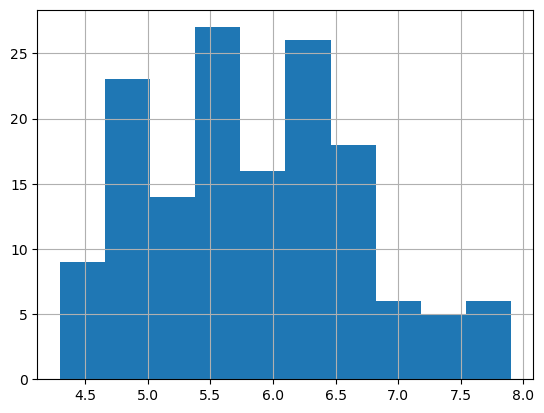

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

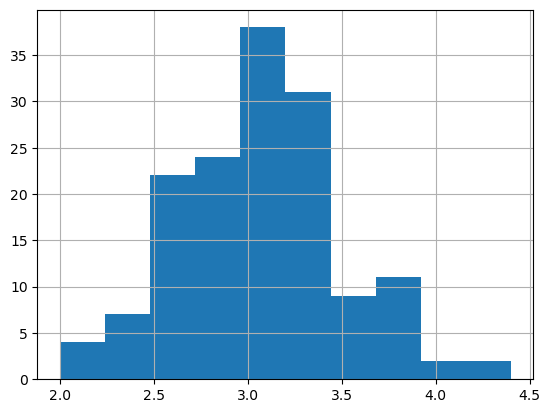

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

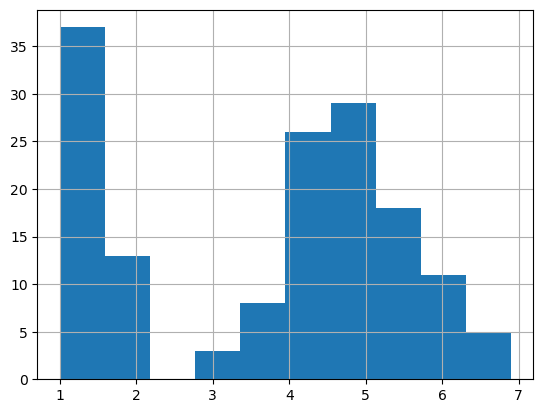

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

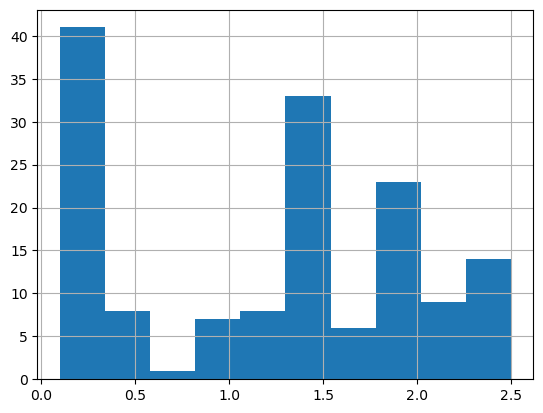

In [12]:
df['PetalWidthCm'].hist()

#### Visualizing the data through scatter plots

In [13]:
#ScatterPlots
colors = ['red','orange','green']
species = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']     
    

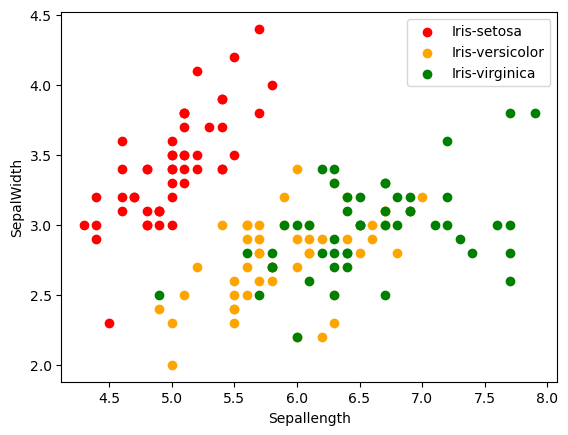

In [14]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'] , c = colors[i], label=species[i])

plt.xlabel("Sepallength")
plt.ylabel("SepalWidth")
plt.legend()    

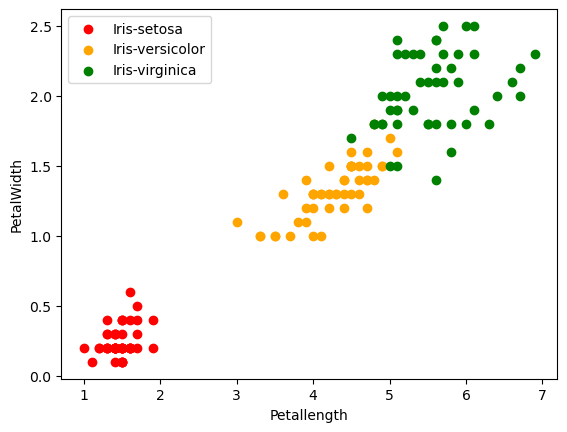

In [15]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'] , c = colors[i], label=species[i])

plt.xlabel("Petallength")
plt.ylabel("PetalWidth")
plt.legend()    

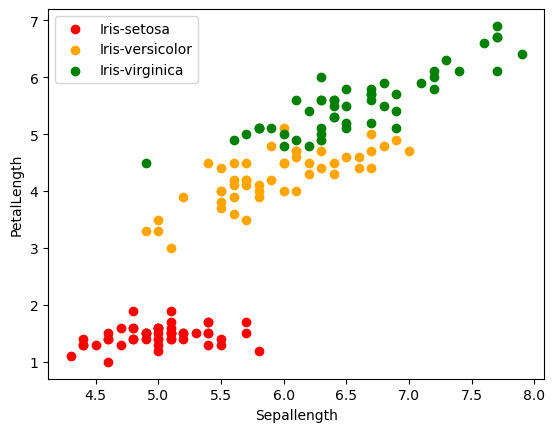

In [16]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'] , c = colors[i], label=species[i])

plt.xlabel("Sepallength")
plt.ylabel("PetalLength")
plt.legend()    

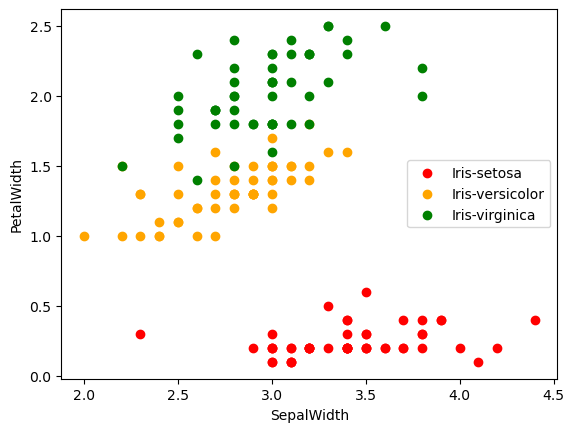

In [17]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'] , c = colors[i], label=species[i])

plt.xlabel("SepalWidth")
plt.ylabel("PetalWidth")
plt.legend()    

#### Finding the data co-relation matrix

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [19]:
df['Species'] = le.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

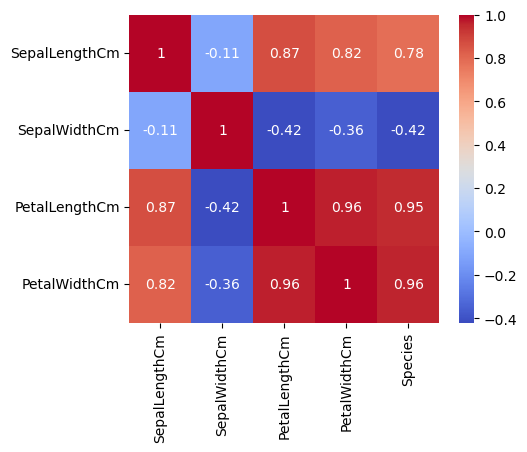

In [20]:
corr = df.corr()
corr = corr.drop('Species' , axis=0)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

#### Splitting the data set for trainning and testing

In [51]:
from sklearn.model_selection import train_test_split
#train - 60
#test - 40
X=df.drop(columns=['Species'])
Y=df['Species']
x_train , x_test, y_train, y_test = train_test_split(X , Y , test_size=0.40) 

#### Logistic Regression model

In [61]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()


In [62]:
model_LR.fit(x_train , y_train)

C:\Users\anvay\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
print("Accuracy = " ,model_LR.score(x_test, y_test)*100)
prediction1 =model_LR.predict(x_test)




Accuracy =  100.0


#### Knn model

In [55]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [56]:
model.fit(x_train , y_train)
print("Accuracy = " ,model.score(x_test, y_test)*100)

Accuracy =  100.0


#### Descion Tree Model

In [57]:
# Descion Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [58]:
model.fit(x_train , y_train)
print("Accuracy = " ,model.score(x_test, y_test)*100)

Accuracy =  100.0


In [ ]:
# Here we can compared different trainning alogorithms and found the accuracy for each one of them